In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyclesperanto as cle
from pyclesperanto.__experimental__ import sato as cle_sato
from pyclesperanto.__experimental__ import hessian_gaussian_eigenvalues
from skimage.filters import sato
from skimage import data

cle.select_device(1,"gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.247.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

In [2]:
image = -(data.brick().astype(np.float32))
sigma = 10
sck_res = sato(image, sigmas=(1,sigma,1))
cle_res = cle_sato(image, sigma_minimum=1, sigma_maximum=sigma, sigma_step=1).get()

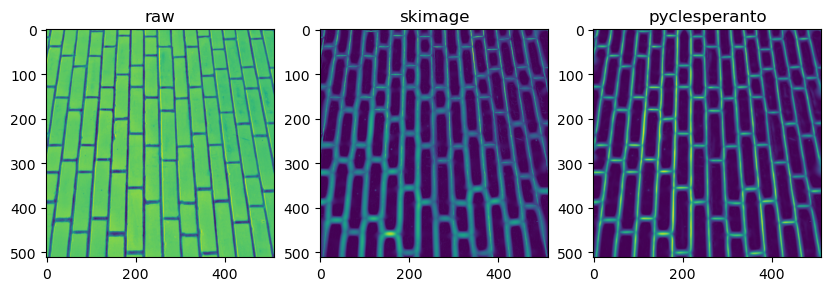

In [3]:
fig, axs = plt.subplots(1,3, figsize=(10,30))
axs[0].imshow(image)
axs[0].set_title("raw")
axs[1].imshow(sck_res, vmin=0, vmax=sck_res.max())
axs[1].set_title("skimage")
axs[2].imshow(cle_res, vmin=0, vmax=cle_res.max())
axs[2].set_title("pyclesperanto")
plt.show()

In [4]:
image = ((data.retina().sum(2)) / 3).astype(np.float32) # RGB so we take the average of the 3 channels
sck_res = sato(image, sigmas=(1,sigma,1))
cle_res = cle_sato(image, sigma_minimum=1, sigma_maximum=sigma, sigma_step=1).get()

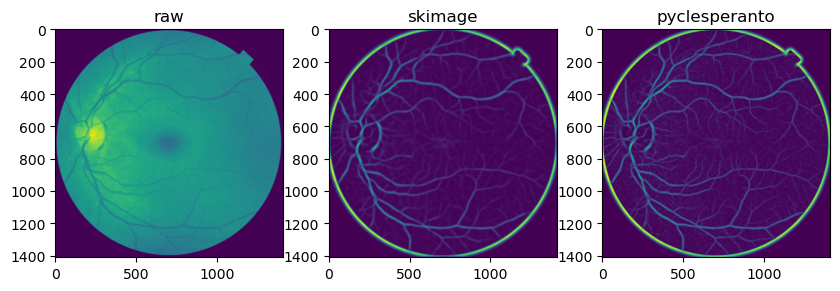

In [5]:
fig, axs = plt.subplots(1,3, figsize=(10,30))
axs[0].imshow(image)
axs[0].set_title("raw")
axs[1].imshow(sck_res, vmin=sck_res.min(), vmax=sck_res.max())
axs[1].set_title("skimage")
axs[2].imshow(cle_res, vmin=cle_res.min(), vmax=cle_res.max())
axs[2].set_title("pyclesperanto")
plt.show()